In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\train",
    image_size=(180,180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\validation",
    image_size=(180,180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\test",
    image_size=(180,180),
    batch_size=32)

data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ]
)

#model definition
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) #input rescaling
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 46s 488ms/step - loss: 0.7217 - accuracy: 0.5690 - val_loss: 0.7165 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 28s 443ms/step - loss: 0.6716 - accuracy: 0.5930 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 28s 442ms/step - loss: 0.6446 - accuracy: 0.6290 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 28s 446ms/step - loss: 0.6231 - accuracy: 0.6550 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 29s 455ms/step - loss: 0.6020 - accuracy: 0.6750 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 6/100
63/63 [==============================] - 29s 458ms/step - loss: 0.5763 - accuracy: 0.6930 - val_loss: 0.7443 - val_accuracy: 0.5000
Epoch 7/100
6

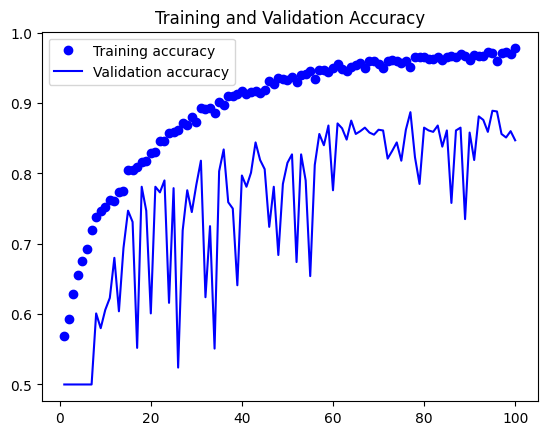

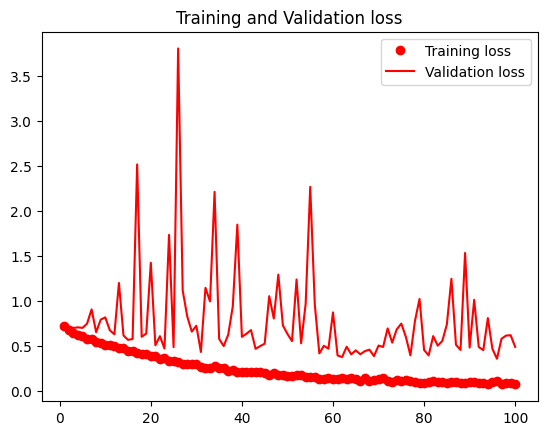

In [5]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()